# Basic Boosters

* Not XGBoost
* [AdaBoost](#AdaBoost)
* [GradientBoost](#GradientBoost)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.facecolor']='w'

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [5]:
teledf = pd.read_csv('data/teledf_final.csv', index_col = 0)
teledf.head()

,Area code_408,Area code_415,Area code_510,Voice mail plan,Churn,International plan,Customer service calls,Total day minutes,Total day charge,Number vmail messages,Total day minutes.1,Total day calls,Total day charge.1,Total eve minutes,Total eve charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls.1
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,265.1,45.07,25.0,265.1,110.0,45.07,197.4,16.78,10.0,3.0,2.70,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,161.6,27.47,26.0,161.6,123.0,27.47,195.5,16.62,13.7,3.0,3.70,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,243.4,41.38,0.0,243.4,114.0,41.38,121.2,10.30,12.2,5.0,3.29,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,2.0,299.4,50.90,0.0,299.4,71.0,50.90,61.9,5.26,6.6,7.0,1.78,2.0
4,0.0,1.0,0.0,0.0,0.0,1.0,3.0,166.7,28.34,0.0,166.7,113.0,28.34,148.3,12.61,10.1,3.0,2.73,3.0


In [6]:
X = teledf.drop(columns = 'Churn')
y = teledf.Churn

In [7]:
X_rest, X_test, y_rest, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_rest, y_rest, test_size = 0.2, random_state = 42)

# AdaBoost

In [9]:

ada_model  = AdaBoostClassifier(random_state = 42)

ada_model.fit(X_train, y_train.values.ravel())
y_train_ada_pred = ada_model.predict(X_train)
ada_model.score(X_train,y_train), ada_model.score(X_test, y_test)


(0.8916510318949343, 0.8755622188905547)

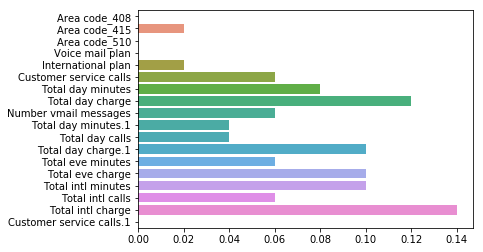

In [13]:
sns.barplot(y=X.columns,x=ada_model.feature_importances_)


# GradientBoost

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)
gb_model.score(X_train, y_train), gb_model.score(X_test, y_test)

(0.9718574108818011, 0.9475262368815592)

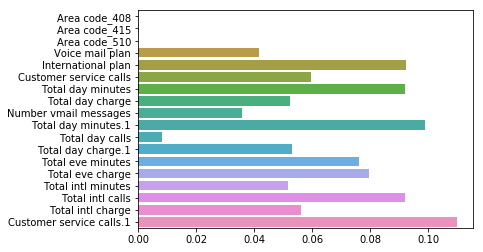

In [16]:
sns.barplot(y=X.columns, x=gb_model.feature_importances_)